In [3]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from util.detectors.arguable_binary_conf_learn import partition_feature_space_kmeans
from util.create_artificial_dataset import create_artificial_dataset, corrupt_sln, corrupt_ccn, corrupt_iln
import matplotlib.pyplot as plt
from util.create_artificial_dataset import create_artificial_dataset, corrupt_ccn
from util.detectors.conf_learn_detector import Conf_Learn_Detector

c:\Users\Mark\miniconda3\envs\master-thesis-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Location of tp, fn in CCN Confident Learning detection

In [4]:
def get_data(alpha, beta):
    df = create_artificial_dataset(n_samples_class1=5000, n_samples_class2=5000)
    df = df.sample(frac=1).reset_index(drop=True)

    ccn_corrupted_data = corrupt_ccn(df, alpha, beta)
    mislabeled_ccn_corrupted = ccn_corrupted_data[ccn_corrupted_data["label"] != ccn_corrupted_data["noisy_label"]]

    detector = Conf_Learn_Detector()

    feature_data = ccn_corrupted_data.drop(["label", "noisy_label"], axis=1)
    noisy_labels = ccn_corrupted_data["noisy_label"]
    issue_indices = detector.detect(feature_data, noisy_labels)

    identified_mislabeled = ccn_corrupted_data.iloc[issue_indices]
    identified_clean = ccn_corrupted_data[~ccn_corrupted_data.index.isin(issue_indices)]

    assert len(identified_mislabeled) + len(identified_clean) == len(ccn_corrupted_data)

    true_positives = identified_mislabeled[identified_mislabeled["noisy_label"] != identified_mislabeled["label"]]
    false_negatives = identified_clean[identified_clean["noisy_label"] != identified_clean["label"]]

    return ccn_corrupted_data, mislabeled_ccn_corrupted, true_positives, false_negatives

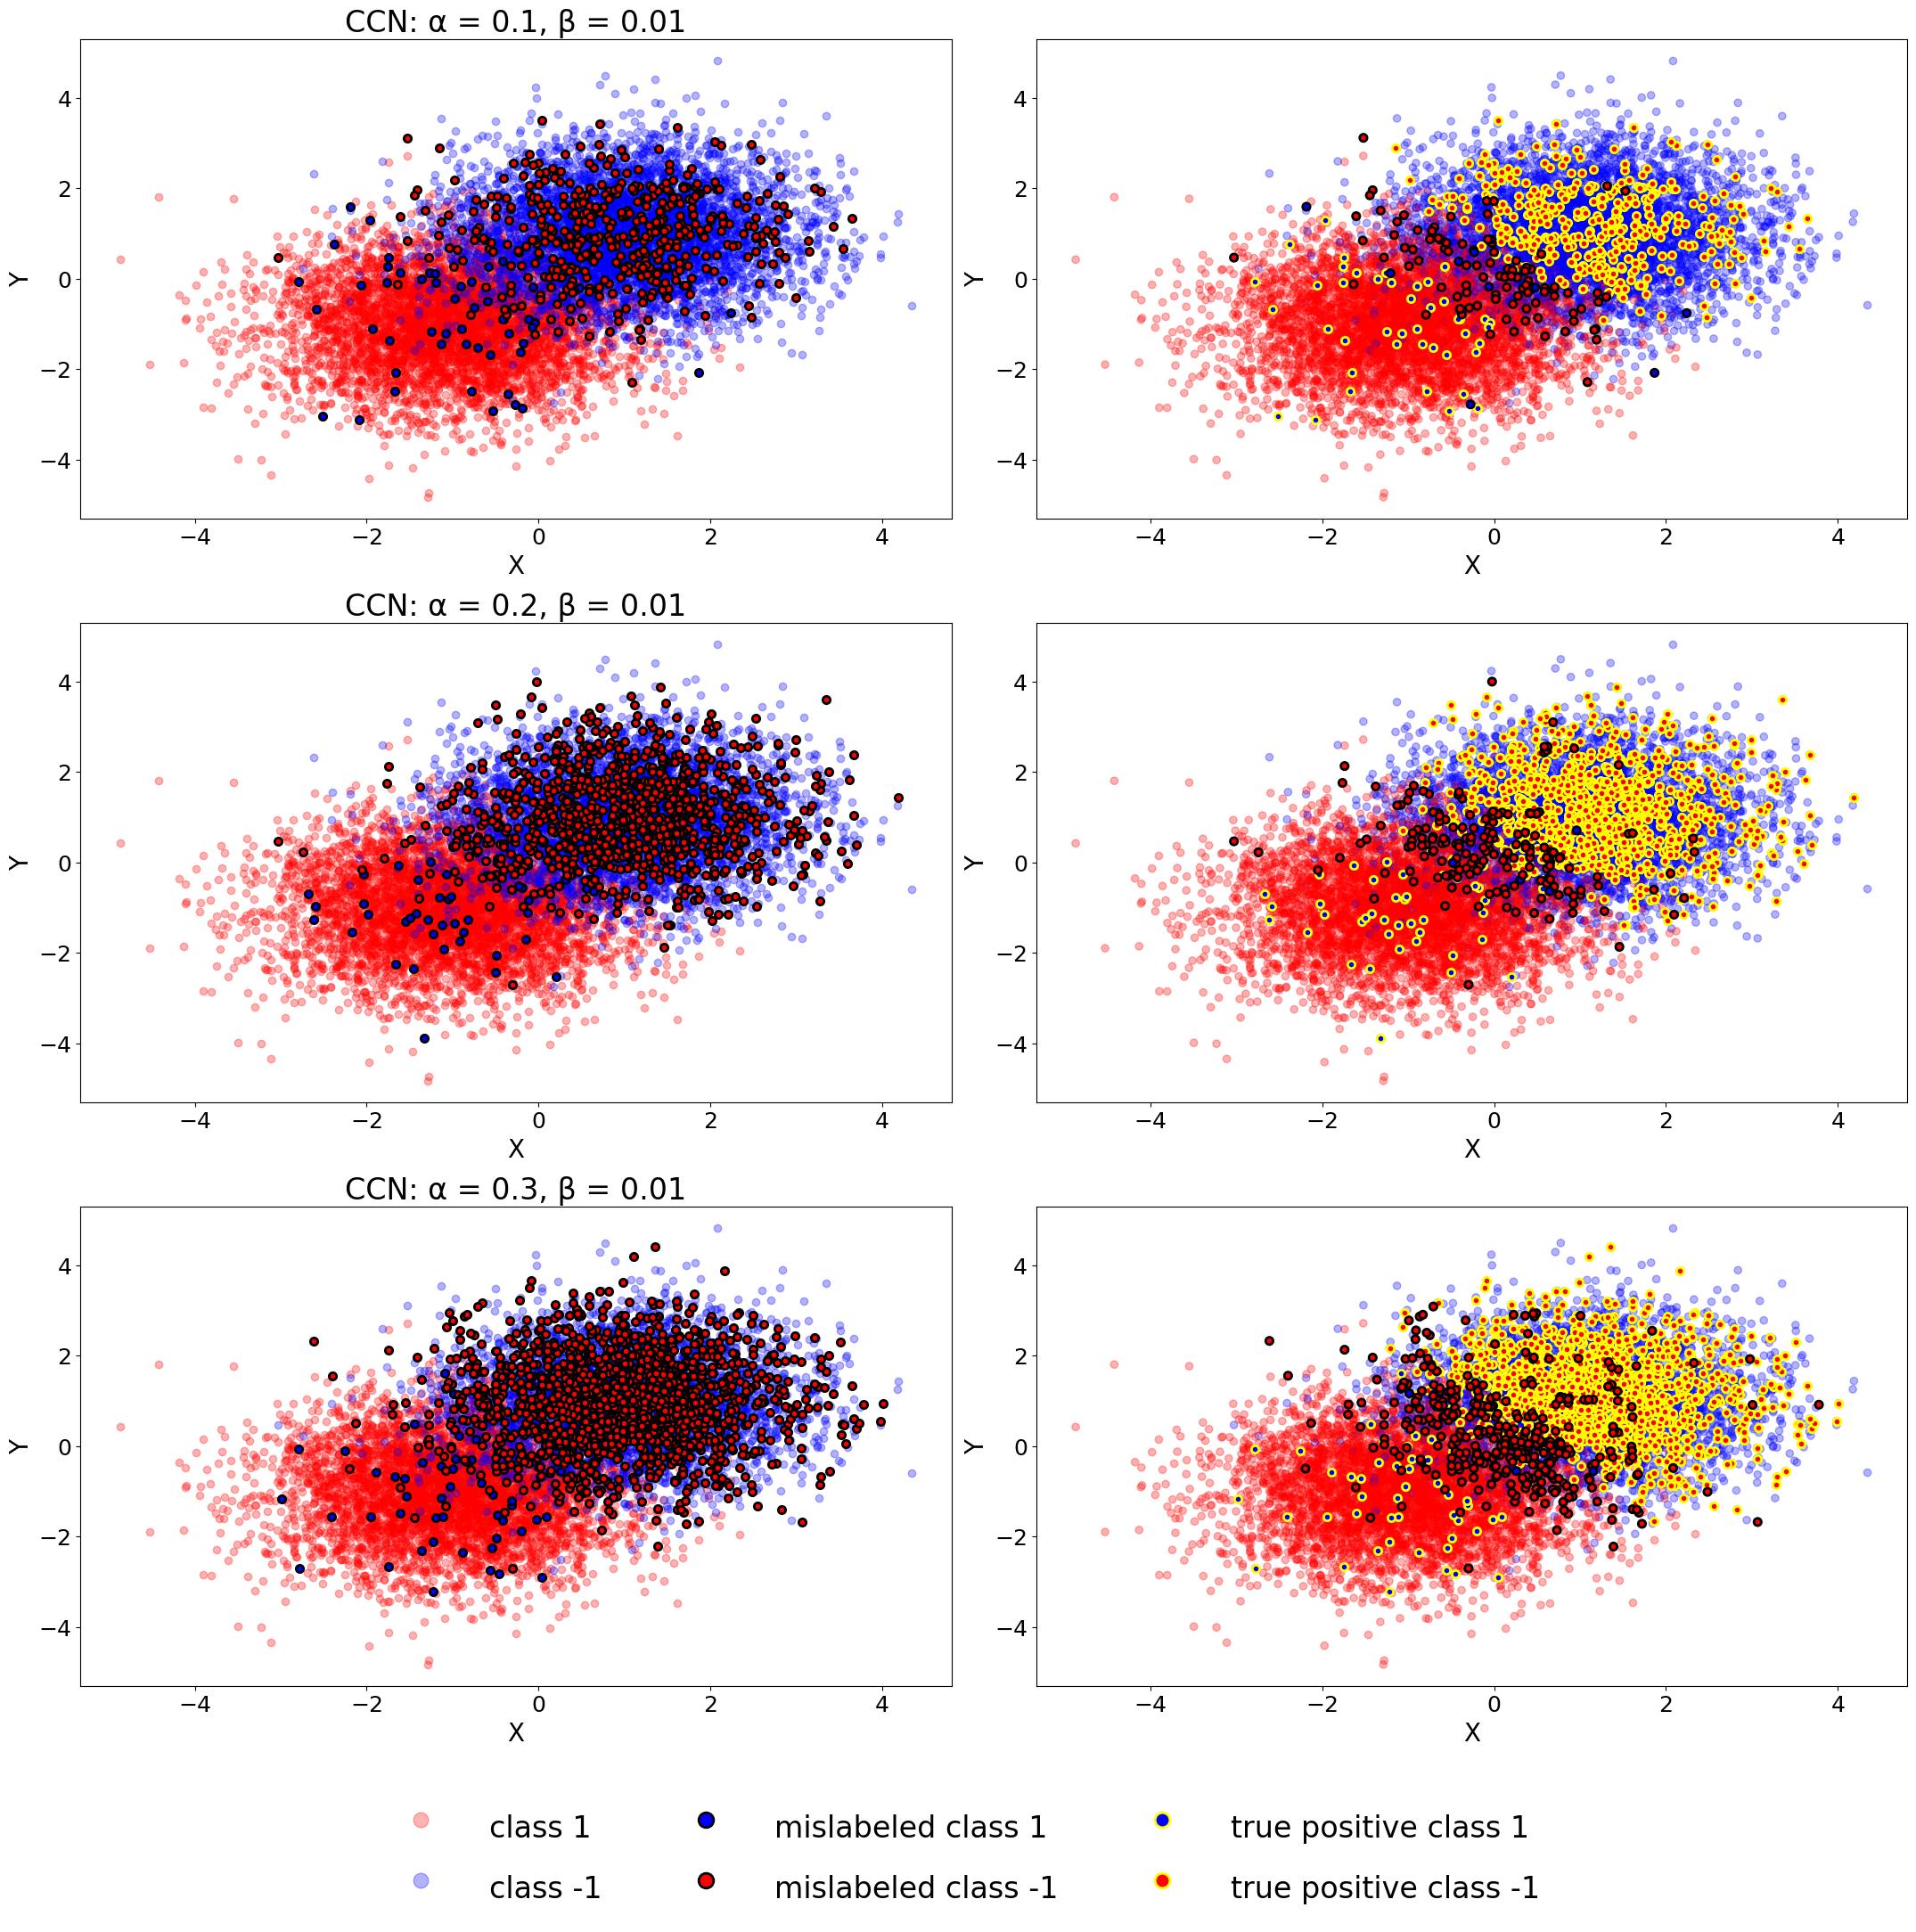

In [7]:
config = [
    (0.1, 0.01),
    (0.2, 0.01),
    (0.3, 0.01),
]

plt.rcParams.update({
    'axes.titlesize': 24,   
    'axes.labelsize': 20,   
    'xtick.labelsize': 18,  
    'ytick.labelsize': 18,  
    'legend.fontsize': 24   
}) 

fig, axs = plt.subplots(len(config), 2, figsize=(24, 20))

for index, (alpha, beta) in enumerate(config):
    ccn_corrupted_data, mislabeled_ccn_corrupted, true_positives, false_negatives = get_data(alpha, beta) 

    clean_matches = ccn_corrupted_data[ccn_corrupted_data["label"] == 1]
    clean_non_matches = ccn_corrupted_data[ccn_corrupted_data["label"] == 0]

    axs[index][0].scatter(clean_matches["x1"], clean_matches["x2"], alpha=0.3, color='red', label='class 1')
    axs[index][0].scatter(clean_non_matches["x1"], clean_non_matches["x2"], alpha=0.3, color='blue', label="class -1")
    axs[index][0].set_title(f"CCN: α = {alpha}, β = {beta}")

    mislabeled_class0 = mislabeled_ccn_corrupted[mislabeled_ccn_corrupted["label"] == 0]
    mislabeled_class1 = mislabeled_ccn_corrupted[mislabeled_ccn_corrupted["label"] == 1]

    axs[index][0].scatter(mislabeled_class1["x1"], mislabeled_class1["x2"], alpha=1, color="blue", edgecolors='black', linewidths=2, label='mislabeled class 1')
    axs[index][0].scatter(mislabeled_class0["x1"], mislabeled_class0["x2"], alpha=1, color="red", edgecolors='black', linewidths=2, label='mislabeled class -1')
    axs[index][0].set_xlabel('X')
    axs[index][0].set_ylabel('Y')

    axs[index][1].scatter(ccn_corrupted_data["x1"], ccn_corrupted_data["x2"], alpha=0.3, c=ccn_corrupted_data["label"], cmap='bwr')

    true_positive_class_0 = true_positives[true_positives["label"] == 0]
    true_positive_class_1 = true_positives[true_positives["label"] == 1]

    axs[index][1].scatter(true_positive_class_1["x1"], true_positive_class_1["x2"], alpha=1, color="blue", edgecolors='yellow', linewidths=2, label='true positive class 1')
    axs[index][1].scatter(true_positive_class_0["x1"], true_positive_class_0["x2"], alpha=1, color="red", edgecolors='yellow', linewidths=2, label='true positive class -1')
    axs[index][1].scatter(false_negatives["x1"], false_negatives["x2"], alpha=1, c=false_negatives["noisy_label"], cmap='bwr', edgecolors='black', linewidths=2)
    axs[index][1].set_xlabel('X')
    axs[index][1].set_ylabel('Y')

handles = []
all_labels = []

axs = axs.flatten()

for i, ax in enumerate(axs):

    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    all_labels.extend(l)
    if i == 1:
        break


fig.legend(handles, all_labels, loc='lower center',
           bbox_to_anchor=(0.55, -0.1),  
           ncol=3, frameon=False, markerscale=2,   
           handlelength=3,  
           handleheight=2)

plt.tight_layout(rect=[0.1, 0, 1, 0.99])  
plt.show()



# Visualization feature space binary, artificial multiclass, multiclass

In [4]:
df = create_artificial_dataset(n_samples_class1=5000, n_samples_class2=5000)
df = df.sample(frac=1).reset_index(drop=True)

iln_corrupted_data = corrupt_iln(df, teacher_model=RandomForestClassifier(), dataset='artificial')
mislabeled_iln = iln_corrupted_data[iln_corrupted_data["label"] != iln_corrupted_data["noisy_label"]]


In [ ]:
from sklearn.datasets import make_blobs

n_samples = 30000       
n_features = 2         
centers = 6        

random_state = 6

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=centers, 
                  cluster_std=1.6, 
                  random_state=random_state
                  )


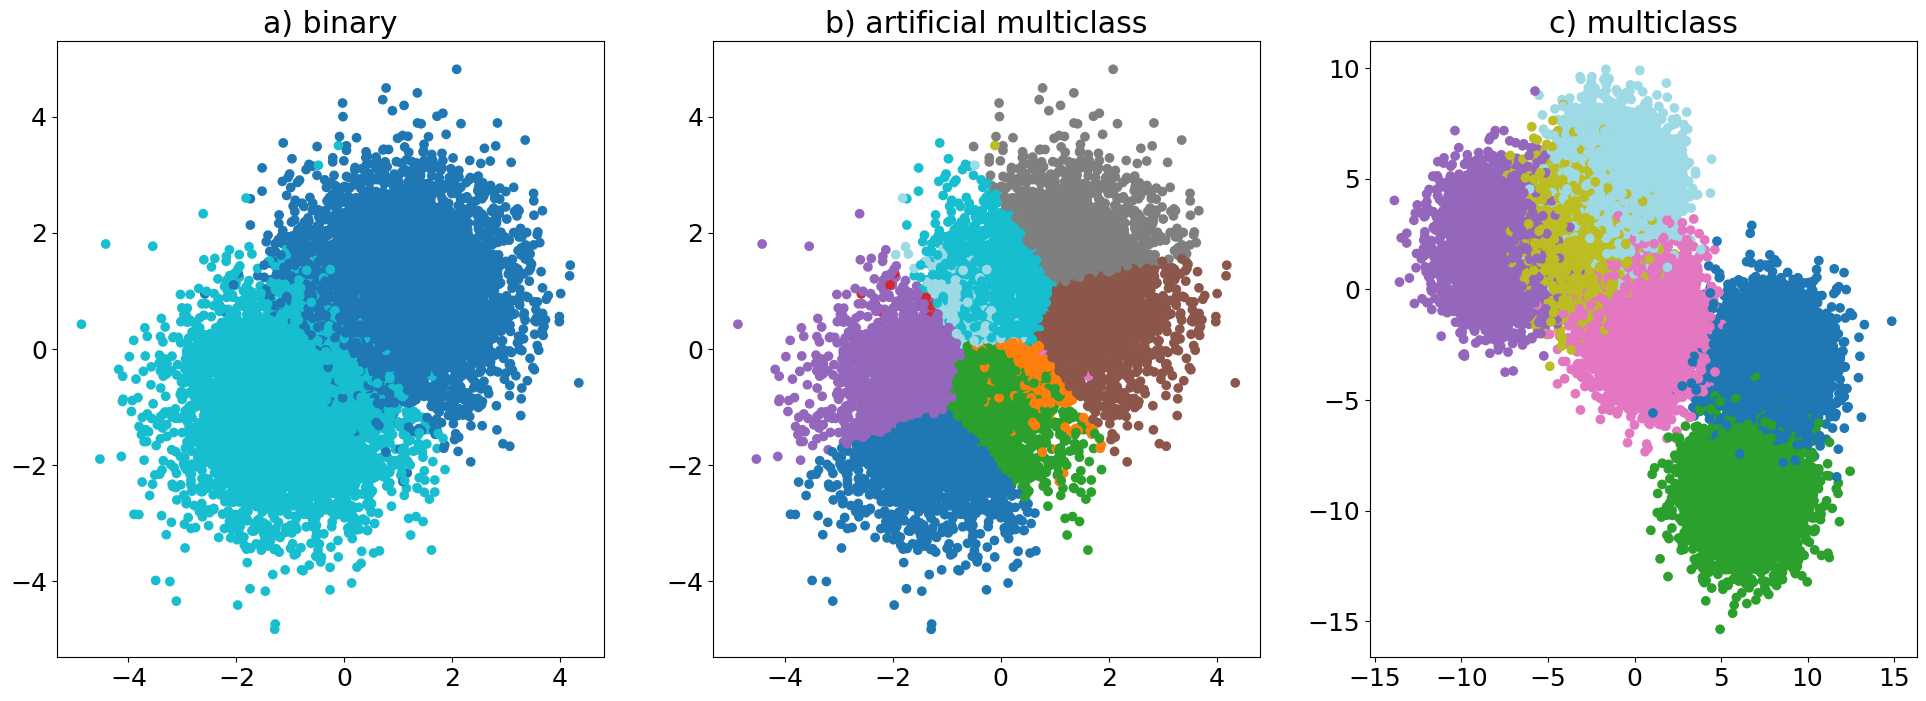

In [7]:
feature_data = iln_corrupted_data.drop(["label", "mislabeling_probability", "noisy_label"], axis=1)

bins = partition_feature_space_kmeans(6, feature_data)

data = feature_data.copy()
data["noisy_label"] = iln_corrupted_data["noisy_label"]
data["bin"] = bins
data["multi_class"] = data.apply(lambda row: f'{int(row["bin"])}_{int(row["noisy_label"])}', axis=1)
data['multi_class'] = data['multi_class'].astype('category').cat.codes

fig, axs = plt.subplots(1, 3, figsize=(24, 8))
plt.rcParams.update({'font.size': 18}) 

axs[0].set_title("a) binary")
axs[0].scatter(data["x1"], data["x2"], c=data["noisy_label"], cmap='tab10')

axs[1].set_title("b) artificial multiclass")
axs[1].scatter(data["x1"], data["x2"], c=data["multi_class"], cmap='tab20')

axs[2].set_title("c) multiclass")
axs[2].scatter(X[:, 0], X[:, 1], c=y, cmap='tab20')

# Visualization different k-means configurations 

In [4]:
import pandas as pd
from util.flatten_evaluation_items import flatten_evaluation_items

import json

path = '../../results/evaluation_conf_learn_adjustment/results.json'

with open(path, "r") as f:
    data = json.load(f)


In [5]:
full_result = []

for d in data:
    for x in d:
        full_result.append(x)

df = pd.DataFrame(full_result)

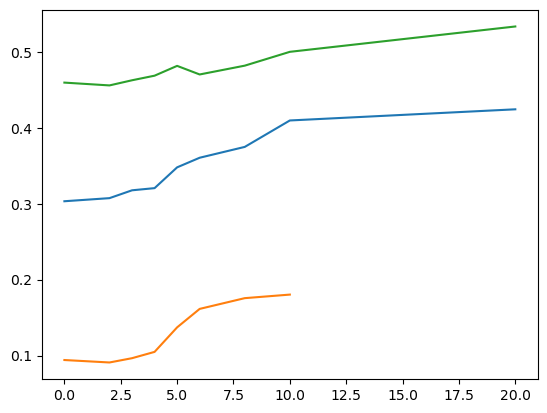

In [ ]:
music_data = df[df["dataset"].str.contains("music")]

music_rf = music_data[music_data["dataset"].str.contains("rf")].replace("baseline", 0)
music_tree = music_data[music_data["dataset"].str.contains("tree")].replace("baseline", 0)
music_svm = music_data[music_data["dataset"].str.contains("svm")].replace("baseline", 0)

wdc_data = df[df["dataset"].str.contains("wdc")]

wdc_rf = wdc_data[wdc_data["dataset"].str.contains("rf")].replace("baseline", 0)
wdc_tree = wdc_data[wdc_data["dataset"].str.contains("tree")].replace("baseline", 0)
wdc_svm = wdc_data[wdc_data["dataset"].str.contains("svm")].replace("baseline", 0)

dexter_data = df[df["dataset"].str.contains("dexter")]

dexter_rf = dexter_data[dexter_data["dataset"].str.contains("rf")].replace("baseline", 0)
dexter_tree = dexter_data[dexter_data["dataset"].str.contains("tree")].replace("baseline", 0)
dexter_svm = dexter_data[dexter_data["dataset"].str.contains("svm")].replace("baseline", 0)


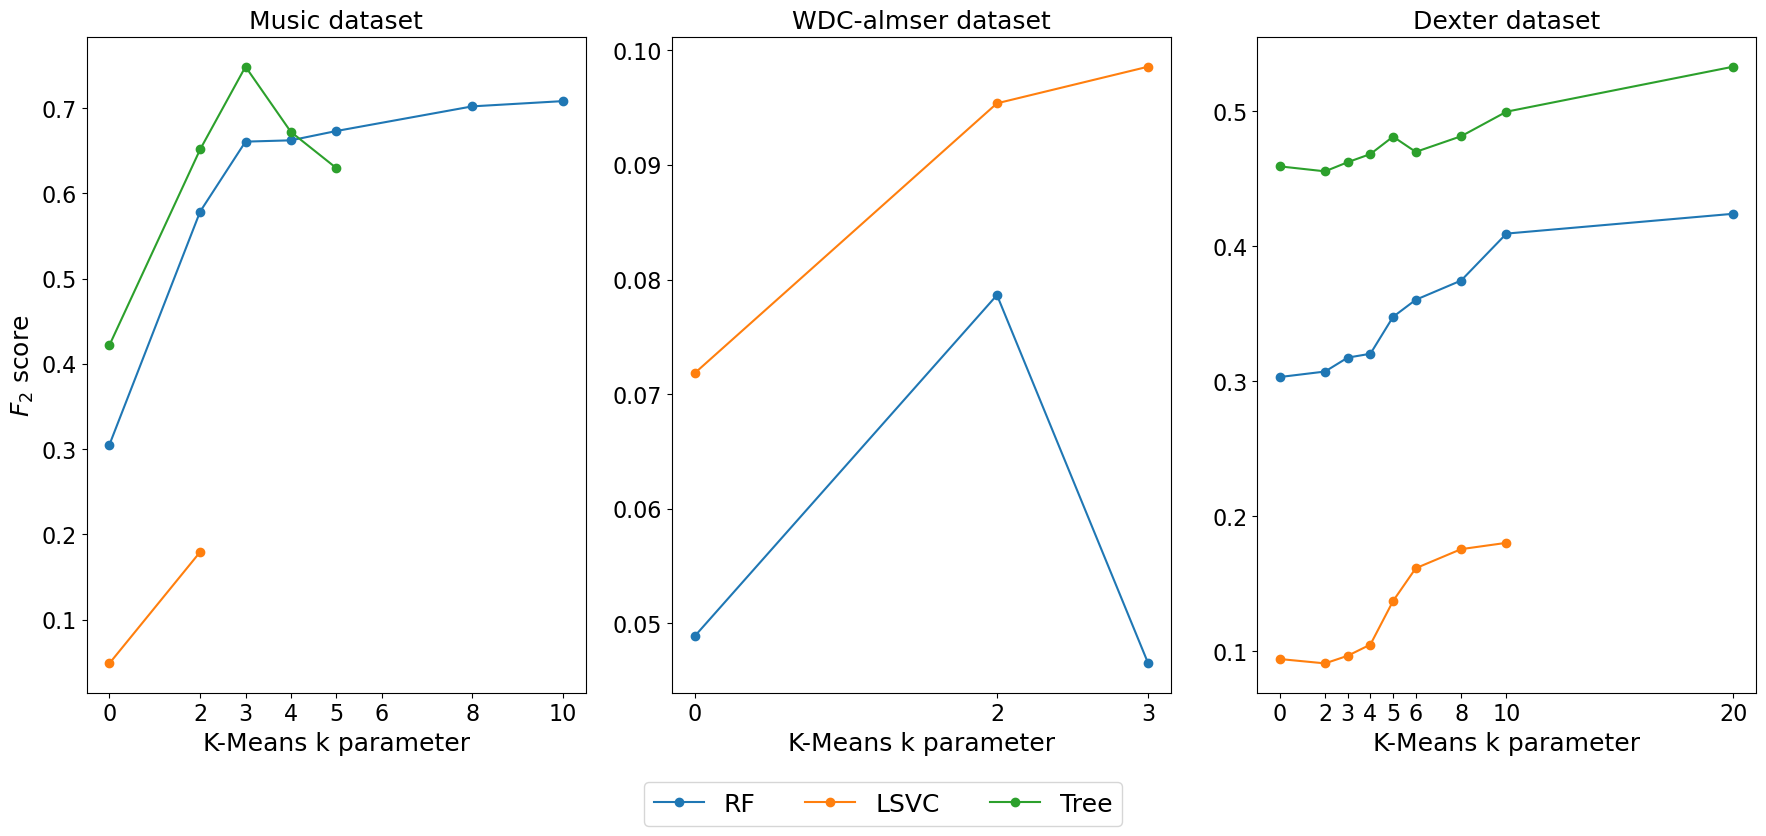

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 8))
plt.rcParams.update({'font.size': 18,
    'axes.titlesize': 18,  
    'axes.labelsize': 18, 
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}) 


axes[0].plot(music_rf["k"], music_rf["f2"], label='RF', marker='o')
axes[0].plot(music_svm["k"], music_svm["f2"], label='LSVC', marker='o')
axes[0].plot(music_tree["k"], music_tree["f2"], label='Tree', marker='o')
axes[0].set_ylabel(r"$F_2$ score")
axes[0].set_title("Music dataset")
axes[0].set_xlabel('K-Means k parameter')
axes[0].set_xticks([0, 2, 3, 4, 5, 6, 8, 10])

axes[1].plot(wdc_rf["k"], wdc_rf["f2"], label='RF', marker='o')
axes[1].plot(wdc_svm["k"], wdc_svm["f2"], label='LSVC', marker='o')
axes[1].set_title("WDC-almser dataset")
axes[1].set_xlabel('K-Means k parameter')
axes[1].set_xticks([0, 2, 3])



axes[2].plot(dexter_rf["k"], dexter_rf["f2"], label='RF', marker='o')
axes[2].plot(dexter_svm["k"], dexter_svm["f2"], label='LSVC', marker='o')
axes[2].plot(dexter_tree["k"], dexter_tree["f2"], label='Tree', marker='o')
axes[2].set_title("Dexter dataset")
axes[2].set_xlabel('K-Means k parameter')
axes[2].set_xticks([0, 2, 3, 4, 5, 6, 8, 10, 20])



handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.07))

plt.tight_layout()
plt.show()
